In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# sonnet data

poems_df = pd.read_csv("full_sonnet_df.csv")
poems_df = poems_df.drop(poems_df.sample(frac=.7).index)
poems_df = poems_df.drop("Unnamed: 0.1", axis=1)
poems_df.head(3)

,Unnamed: 0,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,...,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
2,2,4,10,stress,stress,unstress,missing,missing,stress,stress,...,unstress,stress,missing,missing,"['But', 'as', 'the', 'riper', 'should', 'by', ...",1,Shakespeare,0.000,0.000,1
6,6,8,10,stress,unstress,unstress,stress,unstress,stress,unstress,...,unstress,stress,missing,missing,"['Making', 'a', 'famine', 'where', 'abundance'...",1,Shakespeare,0.000,0.000,1
7,7,9,10,stress,stress,stress,stress,unstress,stress,stress,...,stress,stress,missing,missing,"['Thy', 'self', 'thy', 'foe', 'to', 'thy', 'sw...",1,Shakespeare,-0.325,0.825,1


In [3]:
# bsb data

bsb_df = pd.read_csv("bsb_IP.csv")
bsb_df["sonnet"] = 0
bsb_df.head(3)

,Unnamed: 0,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,...,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,0,1,11,stress,stress,stress,stress,unstress,stress,stress,...,stress,stress,stress,missing,"['Once', 'we', 'were', 'lovers', 'Just', 'love...",1,bsb,0.0,0.0,0
1,1,8,11,stress,stress,stress,stress,stress,stress,stress,...,missing,stress,stress,missing,"['But', 'love', 'is', 'all', 'I', 'have', 'to'...",8,bsb,0.5,0.6,0
2,2,21,11,stress,stress,stress,stress,stress,stress,stress,...,missing,stress,stress,missing,"['But', 'love', 'is', 'all', 'I', 'have', 'to'...",21,bsb,0.5,0.6,0


In [4]:
# taylor data

taylor_df = pd.read_csv("taylor_swift_IP.csv")
taylor_df["sonnet"] = 0
taylor_df.head(3)

,Unnamed: 0,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,...,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,0,1,11,stress,stress,stress,stress,stress,unstress,stress,...,stress,stress,unstress,missing,"['And', 'I', 'was', 'right', 'there', 'beside'...",1,taylor_swift,0.285714,0.535714,0
1,1,22,11,stress,stress,stress,stress,stress,stress,stress,...,unstress,stress,unstress,missing,"['So', 'go', 'and', 'tell', 'your', 'friends',...",22,taylor_swift,0.000000,0.000000,0
2,2,26,11,stress,stress,stress,stress,unstress,stress,stress,...,stress,unstress,stress,missing,"['And', 'if', 'you', 'come', 'around', 'saying...",26,taylor_swift,-0.500000,1.000000,0


In [5]:
final_df = pd.concat([taylor_df, bsb_df, poems_df])

final_df.head(3)

,Unnamed: 0,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,...,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,0,1,11,stress,stress,stress,stress,stress,unstress,stress,...,stress,stress,unstress,missing,"['And', 'I', 'was', 'right', 'there', 'beside'...",1,taylor_swift,0.285714,0.535714,0
1,1,22,11,stress,stress,stress,stress,stress,stress,stress,...,unstress,stress,unstress,missing,"['So', 'go', 'and', 'tell', 'your', 'friends',...",22,taylor_swift,0.000000,0.000000,0
2,2,26,11,stress,stress,stress,stress,unstress,stress,stress,...,stress,unstress,stress,missing,"['And', 'if', 'you', 'come', 'around', 'saying...",26,taylor_swift,-0.500000,1.000000,0


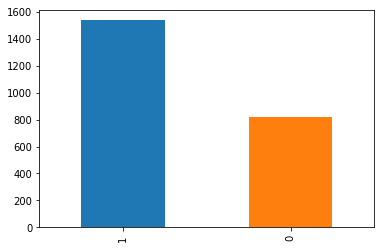

In [6]:
fig, ax = plt.subplots()
final_df['sonnet'].value_counts().plot(ax=ax, kind='bar')

In [8]:
for x in ["syllables","s1","s2","s3","s4","s5","s6","s7","s8","s9","s10","s11","s12","polarity","subjectivity"]:
    meow = pd.crosstab(final_df["sonnet"], final_df[x], margins=True, margins_name="Total")
    print(meow)

syllables  4  5  6  7   8    9   10    11  12  13  Total
sonnet                                                  
0          0  0  0  0   0    0    1   818   0   0    819
1          2  3  7  9  31  238  931   266  47   2   1536
Total      2  3  7  9  31  238  932  1084  47   2   2355
s1      missing  stress  unstress  Total
sonnet                                  
0            52     754        13    819
1            50     874       612   1536
Total       102    1628       625   2355
s2      missing  stress  unstress  Total
sonnet                                  
0            33     708        78    819
1            87    1351        98   1536
Total       120    2059       176   2355
s3      missing  stress  unstress  Total
sonnet                                  
0            28     710        81    819
1            93     652       791   1536
Total       121    1362       872   2355
s4      missing  stress  unstress  Total
sonnet                                  
0            12   